In [ ]:
#pip install seaborn==0.13.0  #Отдельная установка 13 версии seaborn поскольку в 12 версии (которая хранится в anaconda) наблюдаются проблемы с отображением значений на тепловой карте по таблице кореляций (прописывается только 1 строка)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pylab
from scipy.stats import skew, mode
#from math import ceil


In [ ]:
sns.__version__

'0.13.0'

Импорт данных:

In [ ]:
credit = pd.read_csv('credit.csv', sep = ';' )
#credit.head(5)
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170746 entries, 0 to 170745
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   client_id             170746 non-null  int64  
 1   gender                170746 non-null  int64  
 2   age                   170744 non-null  float64
 3   marital_status        170741 non-null  float64
 4   job_position          170746 non-null  int64  
 5   credit_sum            170745 non-null  object 
 6   credit_month          170746 non-null  int64  
 7   score_shk             170743 non-null  object 
 8   education             170743 non-null  float64
 9   tariff_id             170746 non-null  int64  
 10  living_region         170554 non-null  float64
 11  okrug                 170554 non-null  float64
 12  avregzarplata         170554 non-null  float64
 13  monthly_income        170744 non-null  float64
 14  credit_count          161516 non-null  float64
 15  

<table>
  <thead>
    <tr>
      <th colspan="4">Поля таблицы (Dataframe)</th>
    </tr>
  </thead>
  <tbody>
	<tr>
      <td>Столбец</td>
      <td>Значение</td>
	    <td>Формат</td>
	    <td>Изменение формата</td>
    </tr>
    <tr>
      <td>client_id</td>
      <td>Идентификационный номер<br></td>
	    <td>int64</td>
    </tr>
    <tr>
      <td>gender</td>
      <td>Пол<br></td>
	    <td>int64</td>
      <td>Измено на string(object)</td>
    </tr>
    <tr>
      <td>age</td>
      <td>Возраст<br></td>
	    <td>float64</td>
    </tr>
    <tr>
      <td>marital_status</td>
      <td>Семейный статус<br></td>
	    <td>float64</td>
      <td>Измено на string(object)</td>
    </tr>
    <tr>
      <td>job_position</td>
      <td>Работа<br></td>
	    <td>int64</td>
      <td>Измено на string(object)</td>
    </tr>
    <tr>
      <td>credit_sum</td>
      <td>Сумма кредита<br></td>
	    <td>object</td>
      <td>Измено на float</td>
    </tr>
    <tr>
      <td>credit_month</td>
      <td>Срок кредитования<br></td>
	    <td>int64</td>
    </tr>
    <tr>
      <td>score_shk</td>
      <td>Внутренняя скоринговая оценка<br></td>
	    <td>object</td>
      <td>Измено на float</td>
    </tr>
    <tr>
      <td>education</td>
      <td>Образование<br></td>
	    <td>float64</td>
      <td>Измено на string(object)</td>
    </tr>
    <tr>
      <td>tariff_id</td>
      <td>Идентификационный номер тарифа<br></td>
	  <td>float64</td>
     <td>Измено на string(object)</td>
    </tr>
    <tr>
      <td>living_region</td>
      <td>Регион<br></td>string
	    <td>float64</td>
      <td>Измено на string(object)</td>
    </tr>
    <tr>
      <td>monthly_income</td>
      <td>Месячный заработок<br></td>
	  <td>float64</td>
	  <td>Измено на int</td>
    </tr>
    <tr>
      <td>credit_count		</td>
      <td>Количество кредитов у клиента<br></td>
	    <td>float64</td>
	    <td>Измено на int</td>
    </tr>
    <tr>
      <td>overdue_credit_count</td>
      <td>Количество просроченных кредитов у клиента<br></td>
	  <td>float64</td>
    </tr>
	<tr>
      <td>avregzarplata		</td>
      <td>Средняя заработная плата в регионе<br></td>
	  <td>float64</td>
    </tr>
    <tr>
      <td>okrug</td>
      <td>Федеральный округ<br></td>
	   <td>float64</td>
     <td>Измено на string(object)</td>
    </tr>
    <tr>
      <td>open_account_flg	</td>
      <td>Факт открытия кредитного счета в данном банке<br></td>
	  <td>int64</td>
    </tr>
  </tbody>
</table>

In [ ]:
#Проверка на дубли
#credit.duplicated().value_counts()
#Дублей нет
credit.isnull().sum()


client_id                  0
gender                     0
age                        2
marital_status             5
job_position               0
credit_sum                 1
credit_month               0
score_shk                  3
education                  3
tariff_id                  0
living_region            192
okrug                    192
avregzarplata            192
monthly_income             2
credit_count            9230
overdue_credit_count    9230
open_account_flg           0
dtype: int64

<H3>Обработка нулевых значений </H3>


<table>
  <thead>
    <tr>
      <th colspan="4">Поля таблицы с пустыми значениями</th>
    </tr>
  </thead>
<tbody>
<tr>
  <td>Столбец</td>
  <td>Количество пустых строк</td>
  <td>План изменения
    <br> </td>
  <td>Результат</td>
</tr>
<tr>
  <td>age </td>
  <td>2 </td>
  <td> Возраст заполним средним, чтобы не терять строки, 2 из 170746 не приведет к изменению
    <br> </td>
  <td>Заполнили средним - 36</td>
</tr>
<tr>
  <td>marital_status </td>
  <td>5 </td>
  <td> Семейный статус возьмем по Моде столбца, как частое значение
    <br> </td>
  <td>Заполнили Модой - 3 </td>
</tr>
<tr>
  <td>credit_sum </td>
  <td>1 </td>
  <td> Сумма кредита. Необходимо проверить строку на наличие остальных данных о кредите. Если их нет, то проставим 0, иначе строку необходимо удалить
    <br> </td>
  <td>Строка удалена</td>
</tr>
<tr>
  <td>score_shk </td>
  <td>3 </td>
  <td> Платежоспособность. Необходимо заполнить отталкиваясь от среднего для клиентов с таким же количеством кредитов и месячным заработком.
    <br> </td>
  <td>Заполнена модой по пользователям с таким же уровнем дохода и количеством кредитов(уникально для каждого)</td>
</tr>
<tr>
  <td>education </td>
  <td>3 </td>
  <td>Образование. Заполним по моде, за отсутствием иных вариантов рассмотрения
    <br> </td>
  <td>Заполнено модой. 4.0</td>
</tr>
<tr>
  <td>living_region </td>
  <td>192</td>
  <td> Регион проживания. Заполним отдельным значением "Неизвестно", для дальнейшего использования строк по другим показателям
    <br> </td>
  <td>Заполнено значением 'Неизвестно'</td>
</tr>
<tr>
  <td>okrug </td>
  <td>192</td>
  <td> Округ. Заполним отдельным значением "Неизвестно", для дальнейшего использования строк по другим показателям
    <br> </td>
  <td>Заполнено значением 'Неизвестно'</td>
</tr>
<tr>
  <td>avregzarplata </td>
  <td>192</td>
  <td> Средняя ЗП по региону. Заполним отдельным значением 0, для дальнейшего использования строк по другим показателям. (среднее брать не будем, поскольку от региона к региону очень разнятся данные).
    <br> </td>
  <td>Заполнено значением 0, поскольку нулевых заработных плат нет (в частности в таблице)</td>
</tr>
<tr>
  <td>monthly_income </td>
  <td>2 </td>
  <td> Заработок. Заполним средним по региону (столбцом avregzarplata, если таковой в наличии)
    <br> </td>
  <td>Заполнено средним по региону(avregzarplata уникально для каждого)</td>
</tr>
<tr>
  <td>credit_count </td>
  <td>9230</td>
  <td>Количество кредитов. Нужно проверить наличие у таких строк пункта credit_sum и open_account_flg. если они 0, то пропуски "санкционированные" и можно заполнить 0. Иначе, удалить, поскольку предположить количство кредитов относительно сумм будет не корректно. Кредит может быть на любую сумму.
    <br> </td>
  <td>Заменили пустые значения на 999. Это будет явный вылет  все  пропуска. Поскольу 9230 из 170746 это 5% потери данных, в дальнейшем, при анализе по количеству кредитов, мы сможем игнорировать эти значения, но сможем использовать остальные данные строк</td>
</tr>
<tr>
  <td>overdue_credit_count </td>
  <td>9230</td>
  <td>Количество просроченных кредитов. Нужно проверить наличие у таких строк пункта credit_sum и open_account_flg. если они 0, то пропуски "санкционированные" и можно заполнить 0. Иначе, удалить, поскольку предположить количство кредитов относительно сумм будет не корректно. Кредиты могут быть на любую сумму.
    <br> </td>
  <td>Заменили пустые значения на 999. Это будет явный вылет  все  пропуска. Поскольу 9230 из 170746 это 5% потери данных, в дальнейшем, при анализе по количеству кредитов, мы сможем игнорировать эти значения, но сможем использовать остальные данные строк</td>
</tr>

Возраст:

In [ ]:
avg_age = round(credit['age'].mean())
credit['age'].fillna(avg_age, inplace=True)
credit['age'].isnull().sum()
print(avg_age)

#Проверка
#credit['age'].value_counts()

36


Семейный статус:

In [ ]:
mode_family = round(credit['marital_status'].mode())
credit['marital_status'].fillna(mode_family, inplace=True)
credit['marital_status'].isnull().sum()
print(mode_family)

#Проверка
#credit['marital_status'].value_counts()

0    3.0
Name: marital_status, dtype: float64


Сумма кредита:

In [ ]:
credit[credit['credit_sum'].isnull()==True]
# open_account_flg = 0, то есть кредит не открывался. Однако, credit_count = 2, то есть есть 2 кредита, то есть сумма кредитов должна быть. Из-за неоднозначности строку удаляем.
credit.drop(index = credit.index[credit['credit_sum'].isnull()==True] , axis= 0 , inplace= True )

#Проверка
credit['credit_sum'].isnull().sum()
credit['credit_sum'].value_counts()

credit_sum
22990       618
53189       521
39990       461
57789       452
23990       433
           ... 
10482         1
56035,8       1
47328         1
21365,1       1
27556,47      1
Name: count, Length: 42769, dtype: int64

Заработок: (Анализируем раньше, поскольку он понадобится для обработки платежеспособности)

In [ ]:
def monthly_income_full(row):
    for i in Client:
        k=row[row['client_id']==i]['avregzarplata'].values[0]
        credit.loc[credit['client_id']==i, ['monthly_income']] = k

Client = credit[credit['monthly_income'].isnull()==True]['client_id']
monthly_income_full(credit)

#Проверка
#credit[credit['client_id']==5]
#credit.head(10)
credit['monthly_income'].isnull().sum()

0

Количество кредитов + Количество просроченных кредитов: (Анализируем раньше, поскольку он понадобится для обработки платежеспособности)

In [ ]:
#credit[credit['credit_count'].isnull()==True][['credit_count', 'credit_sum','open_account_flg']]
credit[(credit['credit_count'].isnull()==True)&(credit['open_account_flg']==0)&(credit['credit_sum']==0)][['credit_count', 'credit_sum','open_account_flg']]
#нет строк без суммы кредита, остальные строки не дают утверждать, сколько было кредитов.
credit[credit['overdue_credit_count']==999]

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,score_shk,education,tariff_id,living_region,okrug,avregzarplata,monthly_income,credit_count,overdue_credit_count,open_account_flg


In [ ]:
#credit.dropna(subset=['credit_count'], inplace=True)
credit['credit_count']= credit['credit_count'].fillna(999)
credit['overdue_credit_count']= credit['overdue_credit_count'].fillna(999)

#Проверка
credit[credit['credit_count'].isnull()==True]
credit[credit['overdue_credit_count'].isnull()==True]

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,score_shk,education,tariff_id,living_region,okrug,avregzarplata,monthly_income,credit_count,overdue_credit_count,open_account_flg


Платежоспособность:

In [ ]:
credit['monthly_income'].astype(int)
credit['credit_count'].astype(int)

0         1
1         2
2         5
3         2
4         1
         ..
170741    6
170742    1
170743    1
170744    2
170745    3
Name: credit_count, Length: 170745, dtype: int32

In [ ]:
credit.head()

k = credit.loc[(credit['credit_count']==3.0)&(credit['monthly_income']==23000.0), ['score_shk']].mode().values[0]
print(k[0])

#Проверка
credit[credit['score_shk'].isnull()==True]

0,501207


,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,score_shk,education,tariff_id,living_region,okrug,avregzarplata,monthly_income,credit_count,overdue_credit_count,open_account_flg
12,13,2,37.0,3.0,14,42289,10,NaN,4.0,28,3.0,3.0,36850.0,70000.0,1.0,0.0,0
16,17,2,36.0,2.0,14,22612,10,NaN,4.0,20,23.0,8.0,25850.0,50000.0,4.0,0.0,0
20,21,1,28.0,3.0,14,15980,12,NaN,4.0,2,64.0,2.0,23430.0,23000.0,3.0,0.0,1


In [ ]:
def avg_score_shk(row):
    for i in Client:
        credit_count = row[row['client_id']==i]['credit_count'].values[0]
        monthly_income = row[row['client_id']==i]['monthly_income'].values[0]
        k = credit.loc[(credit['credit_count']== credit_count)&(credit['monthly_income']==monthly_income), ['score_shk']].mode().values[0]
        credit.loc[credit['client_id']==i, ['score_shk']] = k[0]

Client = credit[credit['score_shk'].isnull() == True]['client_id']
avg_score_shk(credit)

#Проверка
credit[credit['client_id']==21]
credit.loc[(credit['credit_count']==3.0)&(credit['monthly_income']==23000.0), ['score_shk']].mode().values[0]

array(['0,501207'], dtype=object)

Образование:

In [ ]:
#credit[credit['education'].isnull()==True]

education_avg = credit['education'].mode().values[0]

credit['education']=credit['education'].fillna(education_avg)
credit[credit['education'].isnull()==True]
print(education_avg)

4.0


Регион проживания и Округ.

In [ ]:
credit[(credit['living_region'].isnull()==True) | (credit['okrug'].isnull()==True )]

credit['living_region']=credit['living_region'].fillna('Неизвестно')
credit['okrug']=credit['okrug'].fillna('Неизвестно')

#Проверка
credit[(credit['living_region'].isnull()==True) | (credit['okrug'].isnull()==True )]


,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,score_shk,education,tariff_id,living_region,okrug,avregzarplata,monthly_income,credit_count,overdue_credit_count,open_account_flg


Средняя ЗП по региону:

In [ ]:
credit[credit['avregzarplata']==0]
credit['avregzarplata']=credit['avregzarplata'].fillna(0)

#Проверка
credit[credit['avregzarplata'].isnull()==True]

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,score_shk,education,tariff_id,living_region,okrug,avregzarplata,monthly_income,credit_count,overdue_credit_count,open_account_flg


Обработка некорректных значений в ячейка float(написание через ',') для построения таблицы корреляции:

In [ ]:
credit[credit.score_shk.str.contains(r"\d{5},\d{2}")==True]
#credit['credit_sum'].apply(lambda x: (re.search(r"\d{5},\d{2}", x)))

credit['credit_sum'] = credit['credit_sum'].replace(to_replace =',', value = '.', regex = True)

credit[credit.credit_sum.str.contains(r"\d{5},\d{2}")==True]

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,score_shk,education,tariff_id,living_region,okrug,avregzarplata,monthly_income,credit_count,overdue_credit_count,open_account_flg


In [ ]:
credit[credit.score_shk.str.contains(r"\d{1},\d{6}")==True]
#credit['credit_sum'].apply(lambda x: (re.search(r"\d{5},\d{2}", x)))

credit['score_shk'] = credit['score_shk'].replace(to_replace =',', value = '.', regex = True)
credit.head()
#credit[credit.credit_sum.str.contains(r"\d{1},\d{6}")==True]

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,score_shk,education,tariff_id,living_region,okrug,avregzarplata,monthly_income,credit_count,overdue_credit_count,open_account_flg
0,1,2,48.0,3.0,15,59998,10,0.770249,2.0,28,23.0,8.0,25850.0,30000.0,1.0,1.0,0
1,2,1,28.0,NaN,15,10889,6,0.248514,2.0,2,30.0,7.0,66880.0,43000.0,2.0,0.0,0
2,3,2,32.0,3.0,14,10728,12,0.459589,4.0,2,64.0,2.0,23430.0,23000.0,5.0,0.0,0
3,4,1,27.0,2.0,14,12009.09,12,0.362536,2.0,2,8.0,8.0,23650.0,17000.0,2.0,0.0,0
4,5,2,45.0,3.0,14,16908.89,10,0.421385,4.0,2,77.0,6.0,26620.0,26620.0,1.0,0.0,0


Дополнительное изменение форматов ячеек:


In [ ]:
#Изменение типов категориальных признаков:

credit['living_region']  = credit['living_region'].astype('string')
credit['okrug'] = credit['okrug'].astype('string')
credit['job_position'] = credit['job_position'].astype('string')
credit['education'] = credit['education'].astype('string')
credit['tariff_id'] = credit['tariff_id'].astype('string')
credit['gender'] = credit['gender'].astype('string')
credit['marital_status'] = credit['marital_status'].astype('string')

credit['credit_sum']=credit['credit_sum'].astype('float64')
credit['score_shk']=credit['score_shk'].astype('float64')


#credit_sum и score_shk будут изменены ниже после рассмотрения "исключений".

credit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 170745 entries, 0 to 170745
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   client_id             170745 non-null  int64  
 1   gender                170745 non-null  string 
 2   age                   170745 non-null  float64
 3   marital_status        170741 non-null  string 
 4   job_position          170745 non-null  string 
 5   credit_sum            170745 non-null  float64
 6   credit_month          170745 non-null  int64  
 7   score_shk             170745 non-null  float64
 8   education             170745 non-null  string 
 9   tariff_id             170745 non-null  string 
 10  living_region         170745 non-null  string 
 11  okrug                 170745 non-null  string 
 12  avregzarplata         170745 non-null  float64
 13  monthly_income        170745 non-null  float64
 14  credit_count          170745 non-null  float64
 15  overd

In [ ]:
credit.value_counts()

client_id  gender  age   marital_status  job_position  credit_sum  credit_month  score_shk  education  tariff_id  living_region  okrug  avregzarplata  monthly_income  credit_count  overdue_credit_count  open_account_flg
1          2       48.0  3.0             15            59998.00    10            0.770249   2.0        28         23.0           8.0    25850.0        30000.0         1.0           1.0                   0                   1
113827     2       40.0  2.0             14            36417.05    12            0.331829   2.0        2          31.0           7.0    42460.0        50000.0         5.0           0.0                   0                   1
113829     1       33.0  3.0             14            24208.00    10            0.674287   2.0        28         63.0           3.0    45430.0        30000.0         999.0         999.0                 0                   1
113830     1       30.0  4.0             14            11559.00    10            0.665255   2.0        22

Итог:

Категориальные признаки:

- gender;<br>
- marital_status;<br>
- job_position;<br>
- education;<br>
- tariff_id;<br>
- living_region;<br>
- okrug.<br>

Количественные показатели:

- age;<br>
- credit_sum;<br>
- credit_count;<br>
- monthly_income;<br>
- score_shk;<br>
- overdue_credit_count.<br>

<H3>Первичный анализ общих данных</H3>

<h4>Одномерный анализ</h4>

<h4> Расмотрим категориальные данные.</h4>

In [ ]:
columns1= [ "gender", "okrug","living_region", "job_position"]
#columns1= [ 'education', 'marital_status', 'tariff_id']


for i in columns1:
    agg_func = { i : ['count', 'nunique', pd.Series.mode]}
    print(f'Количество строк, количество уникальных и мода столбца {i} : ','\n', credit.groupby(['open_account_flg']).agg(agg_func), '\n', end = '\n')



Количество строк, количество уникальных и мода столбца gender :  
                   gender             
                   count nunique mode
open_account_flg                     
0                 140689       2    1
1                  30056       2    2 

Количество строк, количество уникальных и мода столбца okrug :  
                    okrug             
                   count nunique mode
open_account_flg                     
0                 140689       9  7.0
1                  30056       8  7.0 

Количество строк, количество уникальных и мода столбца living_region :  
                  living_region              
                         count nunique  mode
open_account_flg                            
0                       140689      82  31.0
1                        30056      81  31.0 

Количество строк, количество уникальных и мода столбца job_position :  
                  job_position             
                        count nunique mode
open_account_flg       

Предполагаем, что из категориальным признаков отличие распределения между открывшими и не открывшими только по столбцам "gender", "okrug" с "living_region"(рассмотрим вместе), "job_position" и "tariff_id".

Исходя из этого несколько гипотез:
1) У клиентов с полом под кодом 2 больше вероятность открыть кредит в банке "gender";
2) У клиентов c некоторых living_region и okrug меньше вероятность открыть счет в рассматриваемом банке (поскольку нет клиентов этого банка из этих округов и регионов);
3) У клиентов c некоторой "job_position" выше вероятность открыть счет в рассматриваемом банке (поскольку нет клиентов не открывших в этом банке с такой позицией);
4) Ряд тарифов влияет на вероятность открытия счета в рассматриваемом банке (множество тарифов не имеется в записях клиентов открывших счет).



In [ ]:
credit_gender = credit.groupby(['open_account_flg','gender'])['client_id'].count()

credit_gender=credit_gender.reset_index()

credit_gender['percent'] = 100 * credit_gender.groupby(['open_account_flg','gender'])['client_id'].transform('sum') / credit_gender.groupby(['open_account_flg'])['client_id'].transform('sum')

credit_gender

,open_account_flg,gender,client_id,percent
0,0,1,74522,52.969315
1,0,2,66167,47.030685
2,1,1,14175,47.161964
3,1,2,15881,52.838036


Процент одного из полов хоть и имеет небольшую разницу в случае с открытыми картами и с неоткрытыми, однако и не в рамках погрешности (более 5%).

Можем заключить, что клиенты с полом под кодом 2 чаще открывают кредит в этом банке.

1 гипотеза подтверждена.

**1 критерий клиента:
Клиент с полом = 2**

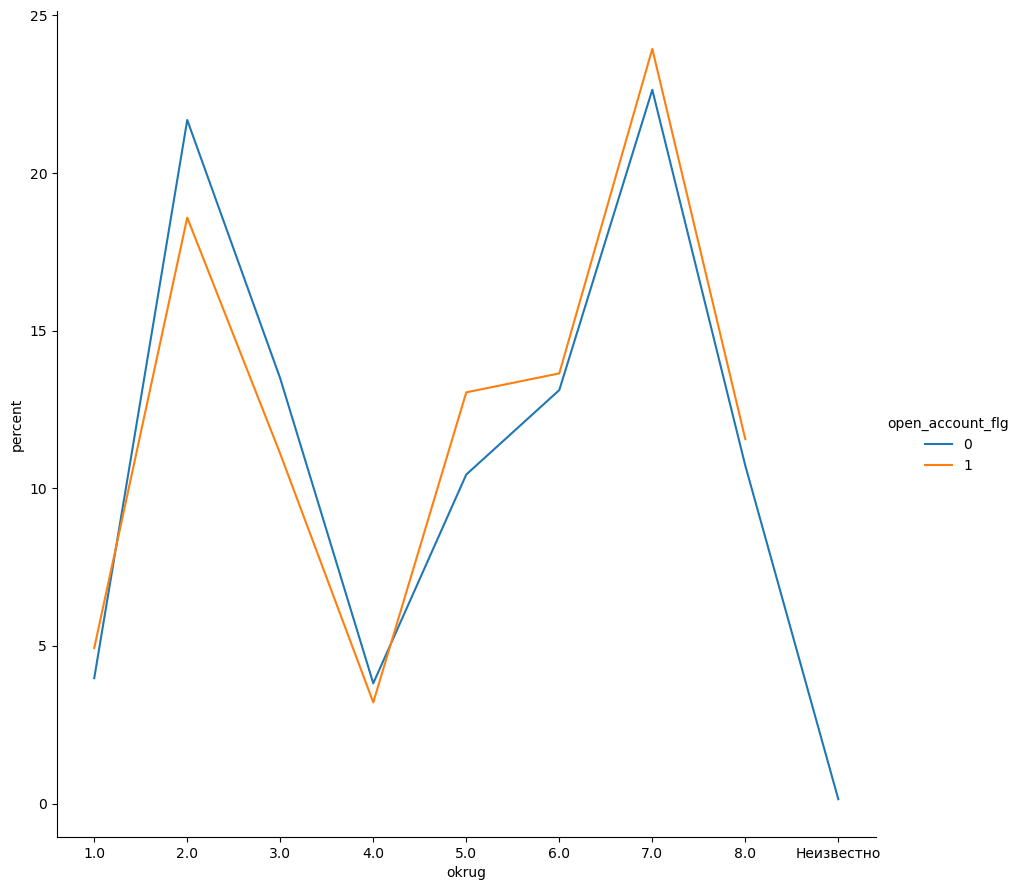

In [ ]:
credit_okrug = credit.groupby(["open_account_flg","okrug"])['client_id'].count()

credit_okrug= credit_okrug.reset_index()

credit_okrug['percent'] = 100 * credit_okrug.groupby(['open_account_flg','okrug'])['client_id'].transform('sum') / credit_okrug.groupby(['open_account_flg'])['client_id'].transform('sum')

sns.relplot(
    x="okrug",
    y="percent",
    data=credit_okrug,
    height=9,
    kind='line',
    hue="open_account_flg")


Отличие округа попали в присвоенный нами пункт "Неизвестно", то есть просто "потерянные данные".

Для достоверности построили график процентной зависимости по округам и получили, что распределение примерно равно.

Гипотеза опровергнута, округ не влияет на открытие счета в рассматриваемом банке.

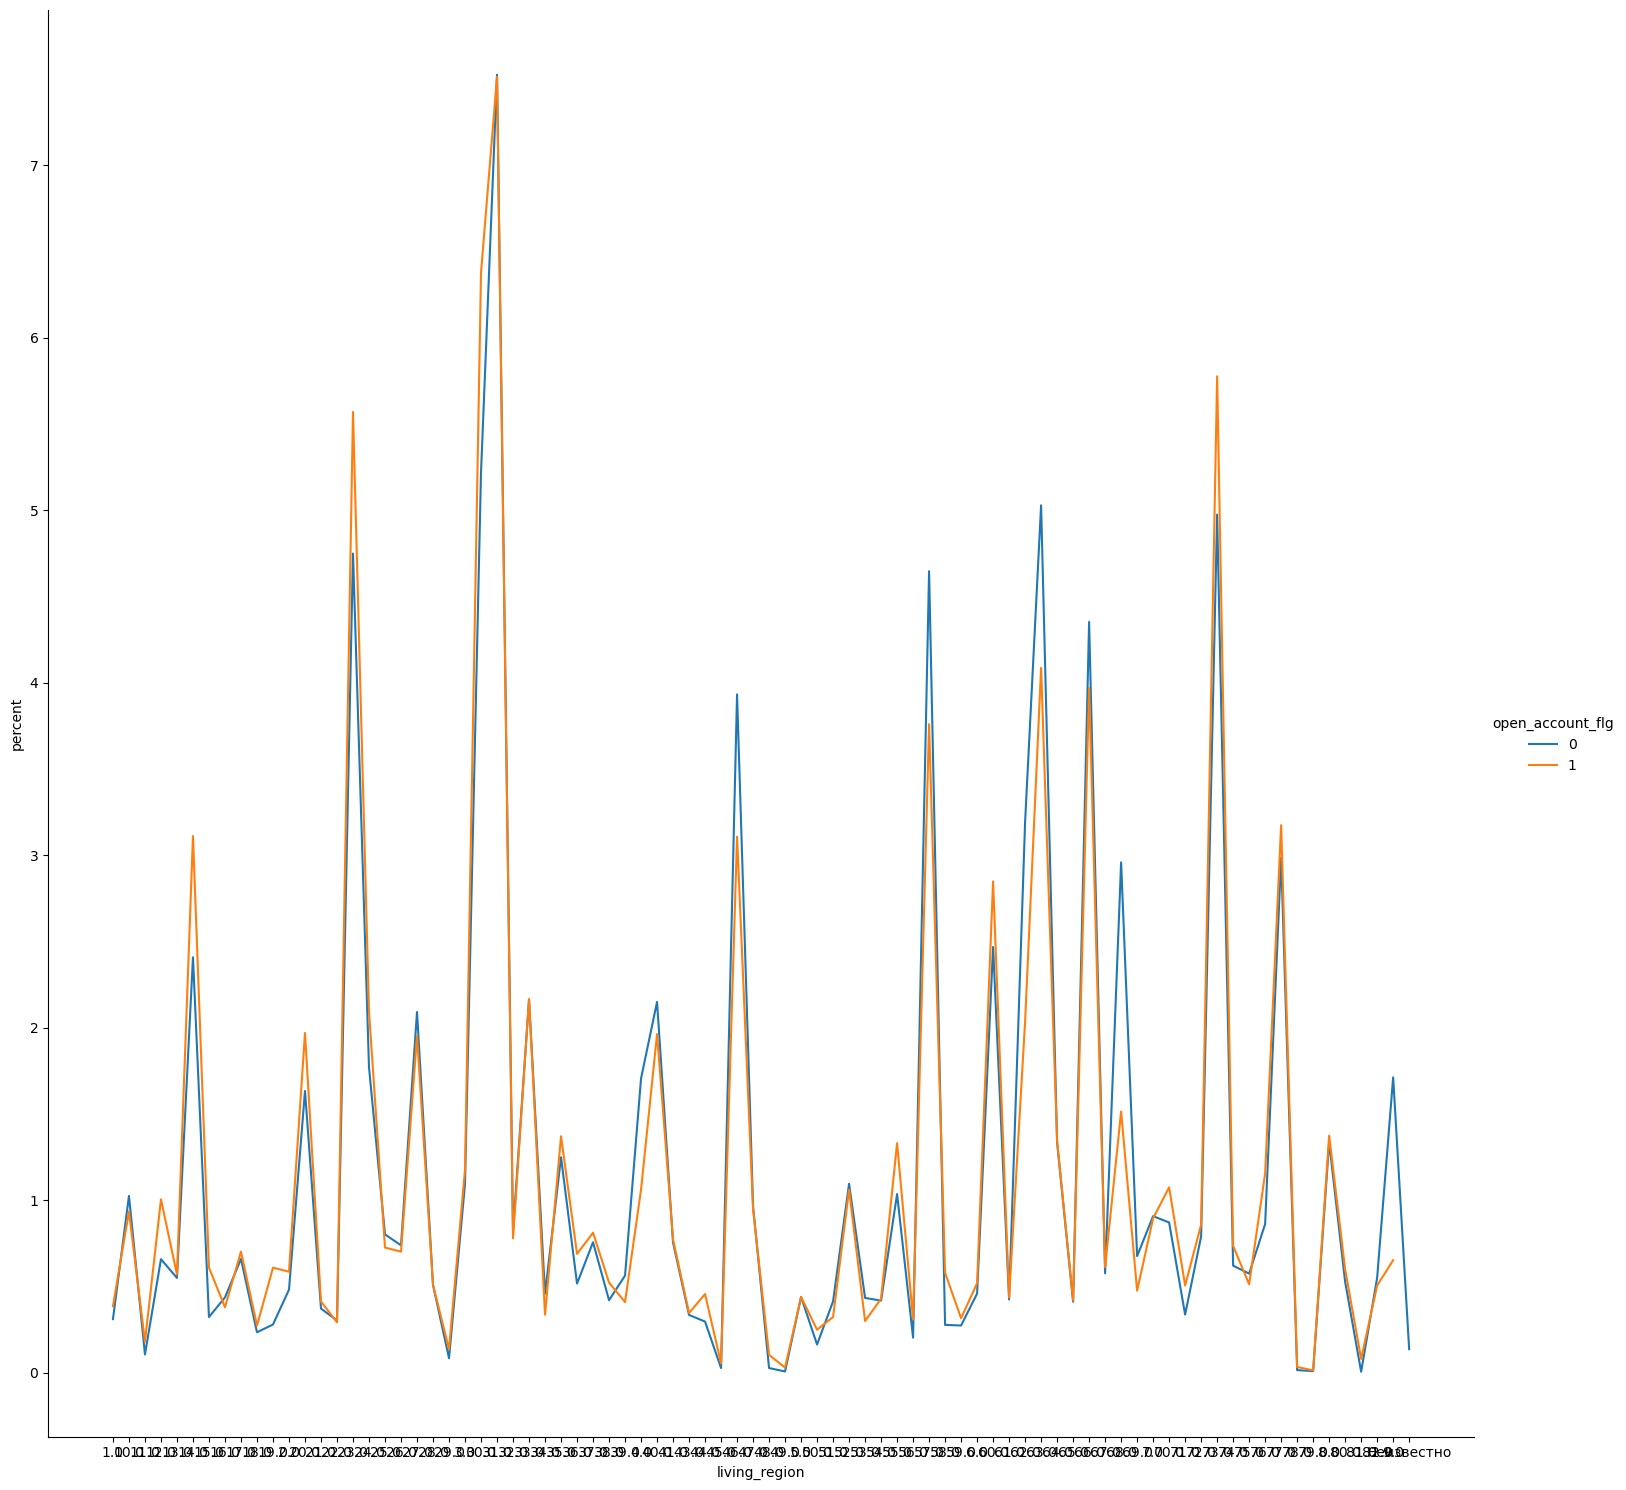

In [ ]:
credit_living_region= credit.groupby(["open_account_flg","living_region"])['client_id'].count()


credit_living_region = credit.groupby(["open_account_flg","living_region"])['client_id'].count()

credit_living_region= credit_living_region.reset_index()

credit_living_region['percent'] = 100 * credit_living_region.groupby(['open_account_flg','living_region'])['client_id'].transform('sum') / credit_living_region.groupby(['open_account_flg'])['client_id'].transform('sum')

sns.relplot(
    x="living_region",
    y="percent",
    data=credit_living_region,
    height=15,
    kind='line',
    hue="open_account_flg");

Отличие региона попали в присвоенный нами пункт "Неизвестно", то есть просто "потерянные данные".

Для достоверности построили график процентной зависимости по регионам и получили, что распределение примерно равно.

Гипотеза опровергнута, регион не влияет на открытие счета в рассматриваемом банке.

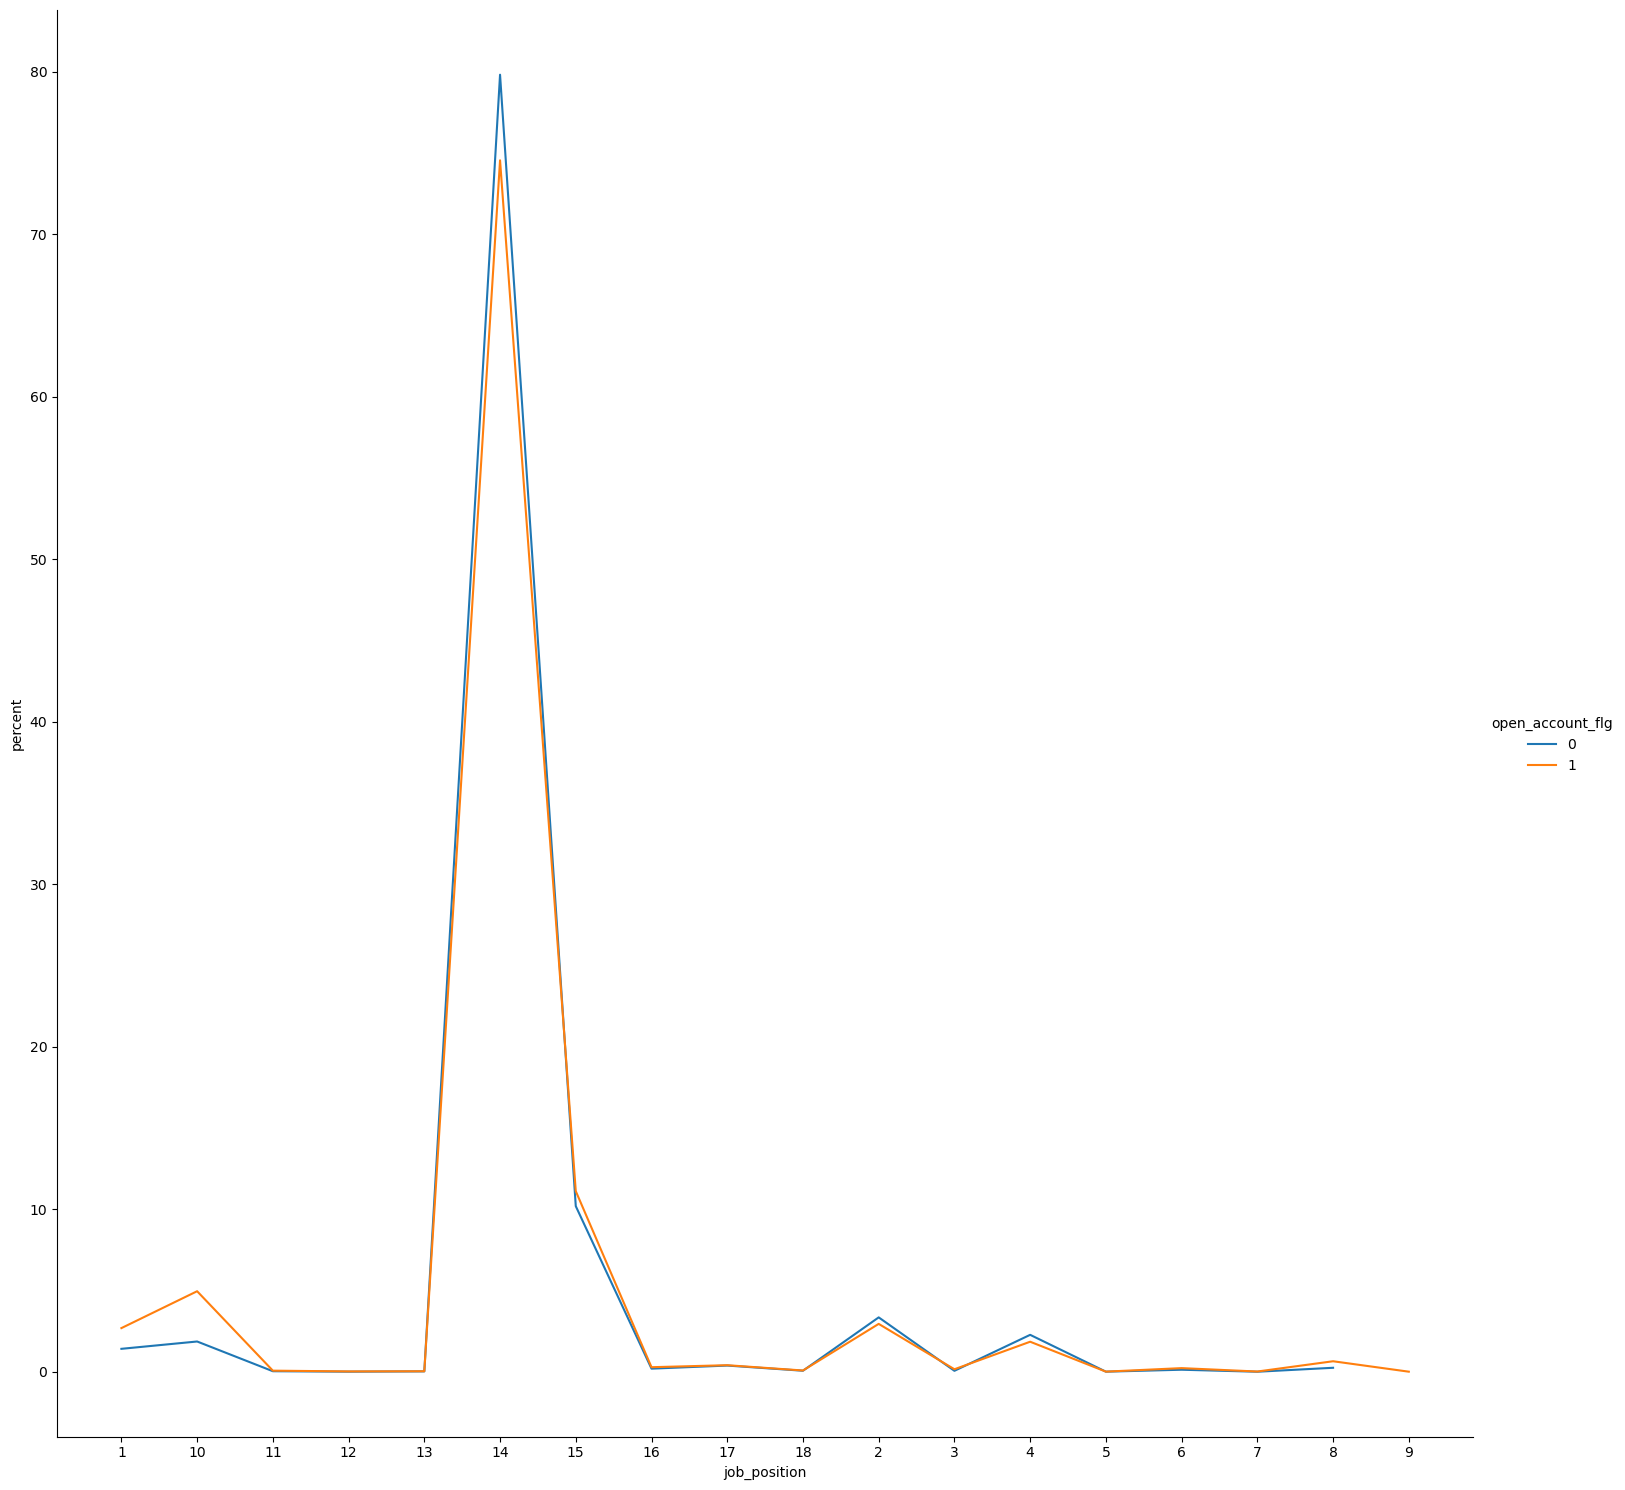

In [ ]:
credit_job_position= credit.groupby(["open_account_flg","job_position"])['client_id'].count()

credit_job_position= credit_job_position.reset_index()

credit_job_position['percent'] = 100 * credit_job_position.groupby(['open_account_flg','job_position'])['client_id'].transform('sum') / credit_job_position.groupby(['open_account_flg'])['client_id'].transform('sum')

credit_job_position[credit_job_position["job_position"]=='9'] # результат o pen_account_flg, job_position, client_id, percent = 34,	1, 9, 1, 0.003327


sns.relplot(
    x="job_position",
    y="percent",
    data=credit_job_position,
    height=15,
    kind='line',
    hue="open_account_flg");

Видим небольшое повышение процента открывших в рассматриваемом банке людей с кодом работы 10. Однако, заявить, что люди с таким образованием чаще открывают кредит в рассматриваемом банке мы не можем. Мы можем сказать, что при данной сфере работ клиент отдает большее предпочтение рассматриваемому банку.

Так же мы видим, что во всей выборке только 1 клиент с работой 9 и он открыл счет именно в рассматриваемом банке.

Гипотеза частично подтверждена.

**2 критерий клиента:
Клиент с работой 9 и 10 охотнее открывают счет в рассматриваемом банке**

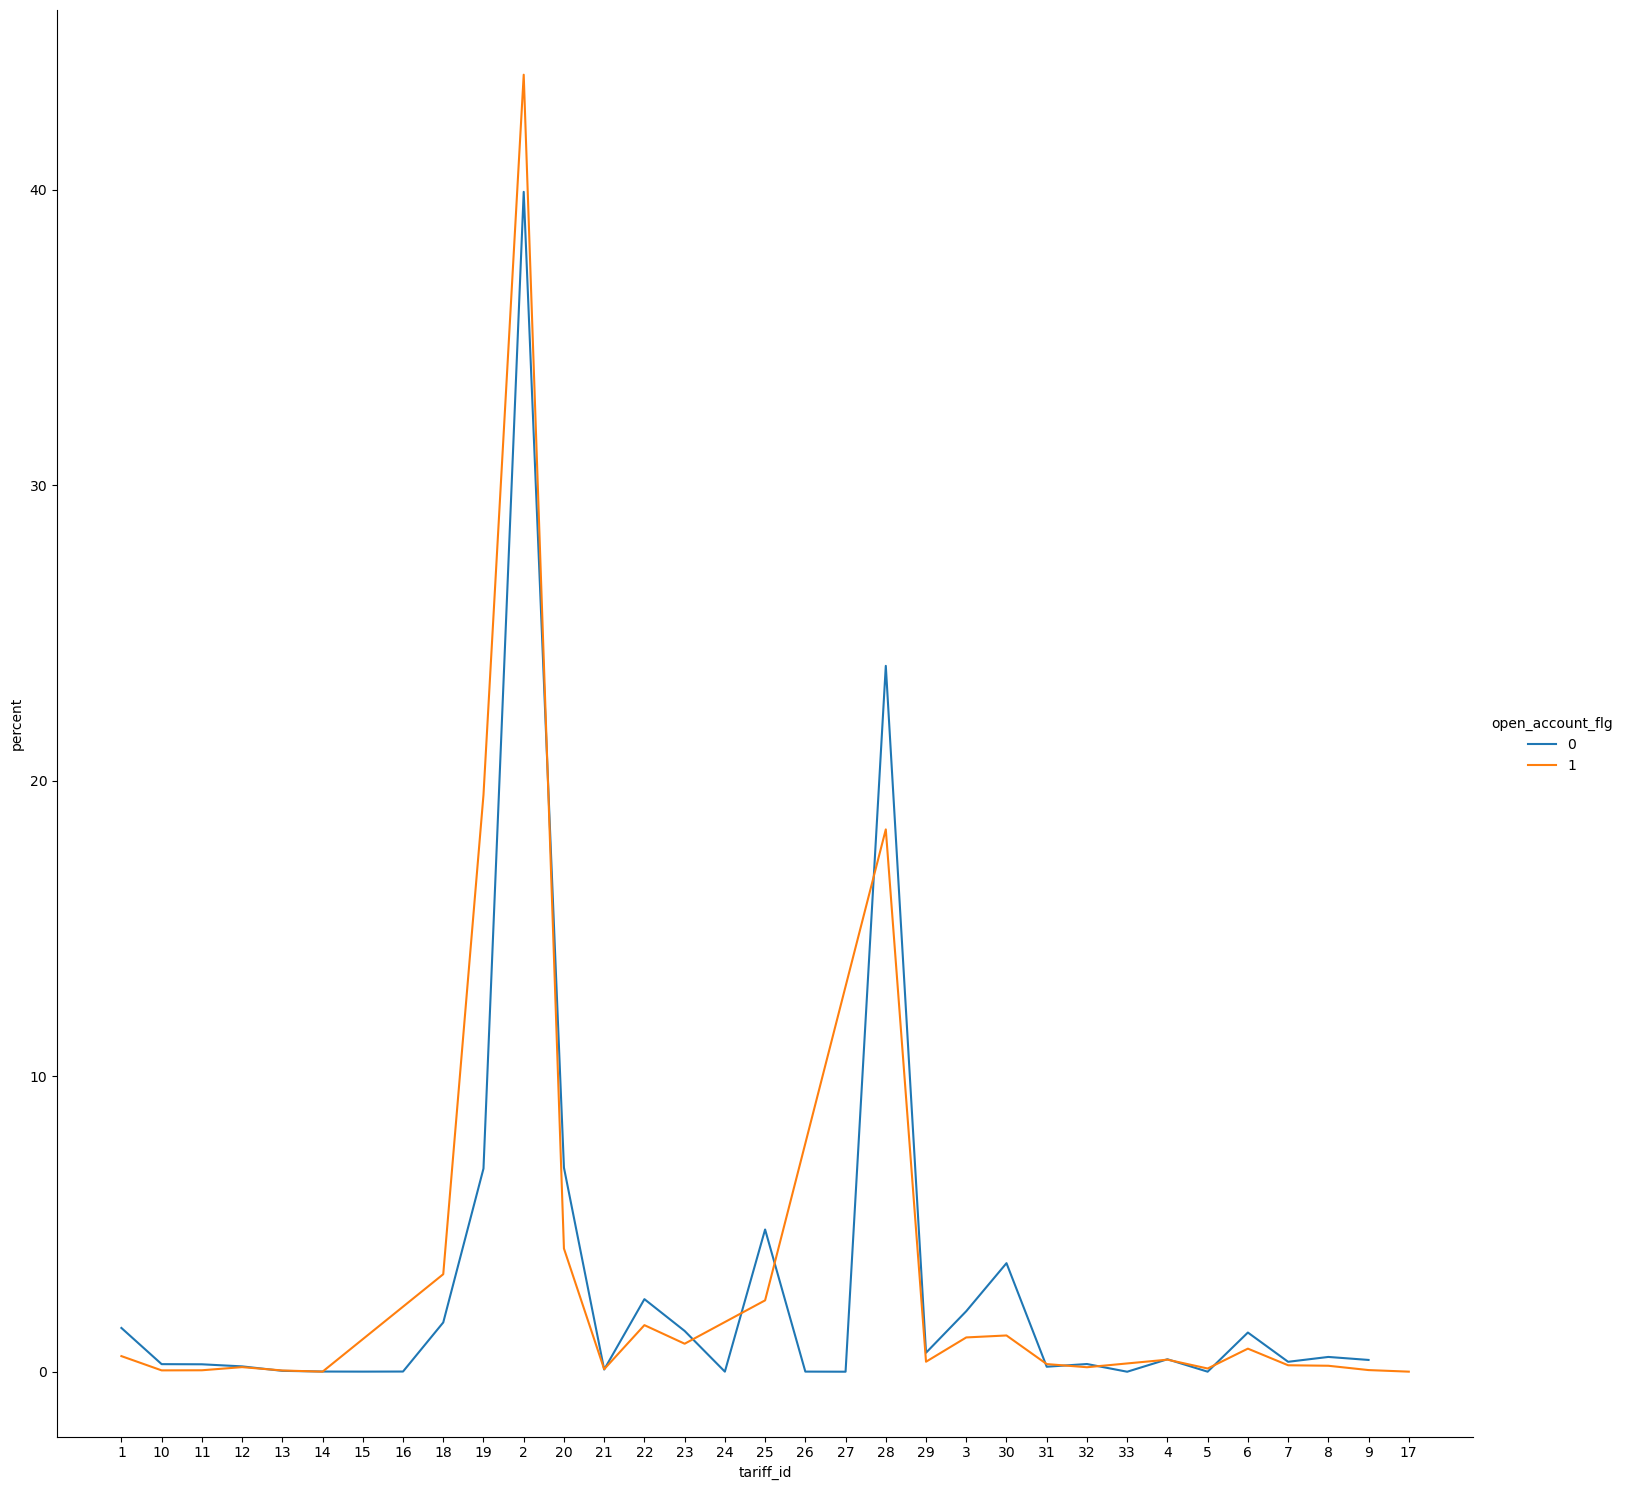

In [ ]:
credit_tariff_id= credit.groupby(["open_account_flg","tariff_id"])['client_id'].count()

credit_tariff_id= credit_tariff_id.reset_index()

credit_tariff_id['percent'] = 100 * credit_tariff_id.groupby(['open_account_flg','tariff_id'])['client_id'].transform('sum') / credit_tariff_id.groupby(['open_account_flg'])['client_id'].transform('sum')

sns.relplot(
    x="tariff_id",
    y="percent",
    data=credit_tariff_id,
    height=15,
    kind='line',
    hue="open_account_flg");



In [ ]:
tariff_id_0 = credit_tariff_id[credit_tariff_id["open_account_flg"]==0]['tariff_id'].to_list()
tariff_id_1 = credit_tariff_id[credit_tariff_id["open_account_flg"]==1]['tariff_id'].to_list()

tariff_0 = [x for x in tariff_id_0 if x not in tariff_id_1]
tariff_1 = [x for x in tariff_id_1 if x not in tariff_id_0]

print (tariff_0,tariff_1)

['15', '16', '24', '26', '27', '33'] ['17']


Мы получили следующую разниуцу по тарифам:

У клиентов с тарифами ['15', '16', '24', '26', '27', '33']  крайне мала вероятноть открыть счет в банке. Так же к меньшей вероятности можно отнести тариф 30,25, 3 и 28.

У клиентов с тарифом ['17'], вероятность открыть счет увеличена. Немного больше вероятность у клиентов с тарифом 2  и 18

Гипотеза частично подтверждена

**3 критерий клиента:**

**Клиент с тарифом 17 наиболее часто открывают счет в рассматриваемом банке.**

**Клиенты с тарифами '15', '16', '24', '26', '27', '33' имеют наименьшую вероятность открыть счет в банке**

Проверим остальные категориальные признаки:


<Axes: xlabel='education', ylabel='client_id'>

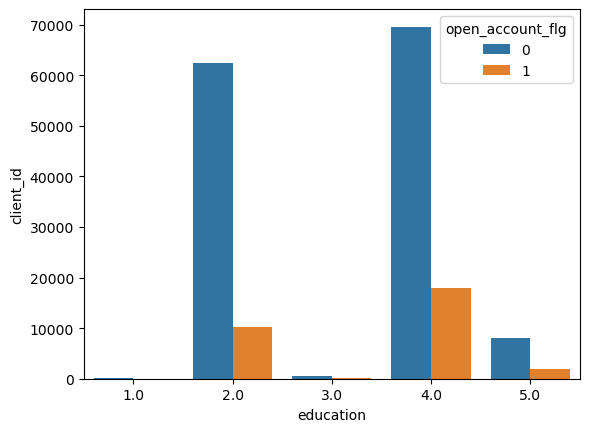

In [ ]:
credit_education= credit.groupby(["open_account_flg","education"])['client_id'].count()
credit_education=credit_education.reset_index()
credit_education
sns.barplot(x='education', y='client_id',  hue='open_account_flg', data=credit_education)
#credit[credit["open_account_flg"]==1]['education'].value_counts().plot(kind='bar', xlabel='education', ylabel='Count', rot=0)

,open_account_flg,education,client_id,percent
0,0,1.0,82,0.058285
1,0,2.0,62463,44.397927
2,0,3.0,457,0.324830
3,0,4.0,69583,49.458735
4,0,5.0,8104,5.760223
5,1,1.0,25,0.083178
6,1,2.0,10130,33.703753
7,1,3.0,108,0.359329
8,1,4.0,17956,59.741815
9,1,5.0,1837,6.111924


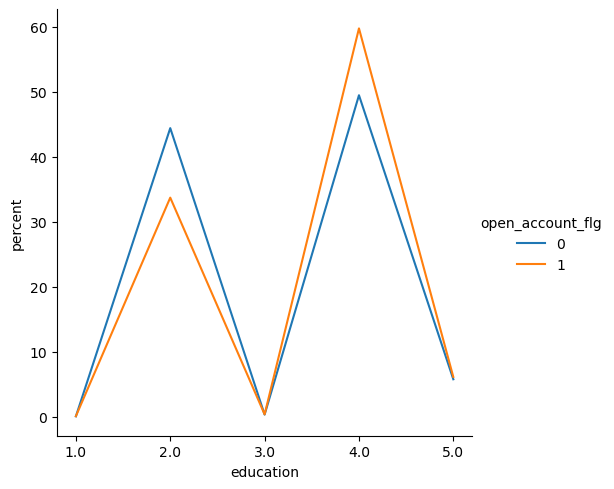

In [ ]:

credit_education['percent'] = 100 * credit_education.groupby(['open_account_flg','education'])['client_id'].transform('sum') / credit_education.groupby(['open_account_flg'])['client_id'].transform('sum')

sns.relplot(
    x="education",
    y="percent",
    data=credit_education,
    height=5,
    kind='line',
    hue="open_account_flg")
credit_education


Явных закономерностей нет, но можем увидеть, что 60% из клиентов открывших счет с образованием кода 4, в свою очередь с не открывших. процент меньше, (примерно равно обратной разницн с образованием кода 2)

<Axes: xlabel='education', ylabel='Count'>

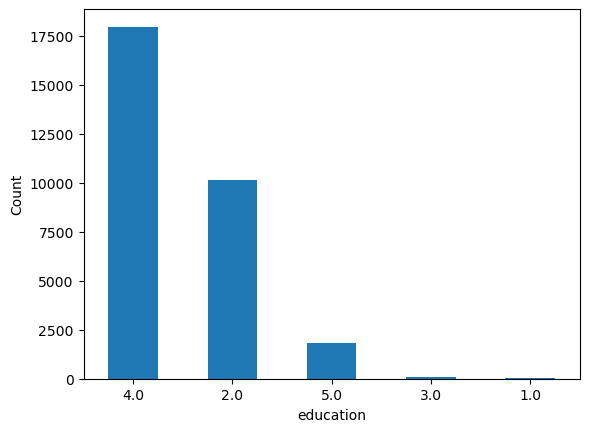

In [ ]:
credit[credit["open_account_flg"]==1]['education'].value_counts().plot(kind='bar', xlabel='education', ylabel='Count', rot=0)

**4 критерий клиента:
Образование  с кодом 4**

,open_account_flg,marital_status,client_id,percent
0,0,1.0,3350,2.381206
1,0,2.0,13880,9.866013
2,0,3.0,79584,56.568931
3,0,4.0,41132,29.236948
4,0,5.0,2739,1.946903
5,1,1.0,846,2.814746
6,1,2.0,3090,10.280809
7,1,3.0,14368,47.804099
8,1,4.0,11016,36.651584
9,1,5.0,736,2.448762


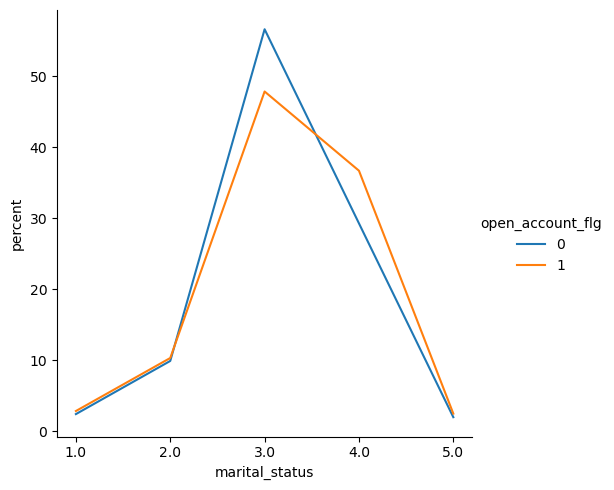

In [ ]:
credit_marital_status= credit.groupby(["open_account_flg","marital_status"])['client_id'].count()
credit_marital_status=credit_marital_status.reset_index()
credit_marital_status['percent'] = 100 * credit_marital_status.groupby(['open_account_flg','marital_status'])['client_id'].transform('sum') / credit_marital_status.groupby(['open_account_flg'])['client_id'].transform('sum')

sns.relplot(
    x="marital_status",
    y="percent",
    data=credit_marital_status,
    height=5,
    kind='line',
    hue="open_account_flg")
credit_marital_status


Небольшое преобладаение в семейном статусе 4, но не критично. Однако, почти 50 процентов приходится на семейный статус 3. Не смотря на то что не открывших так же более 50 процентов в другом банке, мы все-равно можем утвредить, что клиент с семейным статусом 3 более "охотно" откроет кредит в банке ("равновероятно" в этом или в другом)

**5 критерий клиента:**

**Вероятнее всего клиент будет с семейным статусом 3.**


<h4> Рассмотрим количественные данные.</h4>

Анализ внутренней оценки (score_shk):


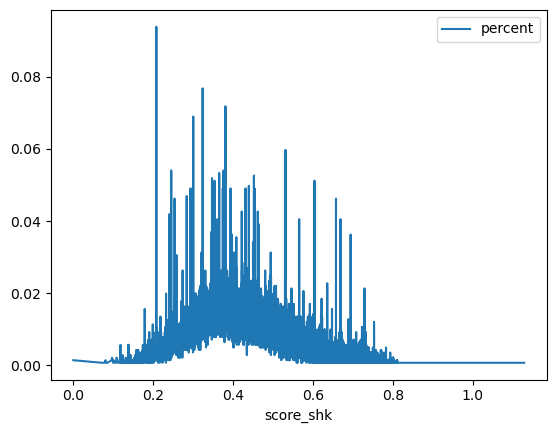

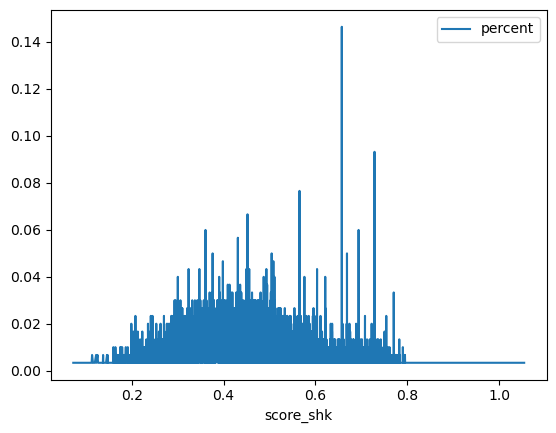

In [ ]:
credit_score_shk= credit.groupby(["open_account_flg","score_shk"])['client_id'].count()
credit_score_shk=credit_score_shk.reset_index()
credit_score_shk['percent'] = 100 * credit_score_shk.groupby(['open_account_flg','score_shk'])['client_id'].transform('sum') / credit_score_shk.groupby(['open_account_flg'])['client_id'].transform('sum')

'''
sns.relplot(
    x="score_shk",
    y="percent",
    data=credit_score_shk,
    height=5,
    kind='line',
    hue="open_account_flg")
'''

credit_score_shk[credit_score_shk['open_account_flg']==0].plot( x = 'score_shk' , y = 'percent')
pylab.subplot (1, 1, 1)
credit_score_shk[credit_score_shk['open_account_flg']==1].plot( x = 'score_shk' , y = 'percent')

pylab.show()



Явно видно что есть ассиметрия. При этом в случае не открывших смещение в лево, а для открывших в право.

Рассмотрим относительно медианы количество значений. Поскольку ассиметрия относительно середины.

In [ ]:
median_0 = credit_score_shk[credit_score_shk['open_account_flg']==0]['score_shk'].median()
median_1 = credit_score_shk[credit_score_shk['open_account_flg']==1]['score_shk'].median()

print('Медиана по внутренней оценке не открыших счет клиентов:', median_0, 'Медиана по внутренней оценке открыших счет клиентов:',median_1, sep= '\n')

print()

percent_0_up = credit_score_shk[(credit_score_shk['open_account_flg']==0)&(credit_score_shk['score_shk'] > median_0)]['client_id'].sum() / credit_score_shk[credit_score_shk['open_account_flg']==0]['client_id'].sum() * 100
percent_0_foot= credit_score_shk[(credit_score_shk['open_account_flg']==0)&(credit_score_shk['score_shk'] < median_0)]['client_id'].sum() / credit_score_shk[credit_score_shk['open_account_flg']==0]['client_id'].sum() * 100

percent_1_up = credit_score_shk[(credit_score_shk['open_account_flg']==1)&(credit_score_shk['score_shk'] > median_1)]['client_id'].sum() / credit_score_shk[credit_score_shk['open_account_flg']==1]['client_id'].sum() * 100
percent_1_foot= credit_score_shk[(credit_score_shk['open_account_flg']==1)&(credit_score_shk['score_shk'] < median_1)]['client_id'].sum() / credit_score_shk[credit_score_shk['open_account_flg']==1]['client_id'].sum() * 100


print('Процент клиентов не открывших счет с оценкой ниже медианы:',percent_0_foot  ,
      'Процент клиентов не открывших счет с оценкой выше медианы', percent_0_up,
      'Процент клиентов открывших счет с оценкой ниже медианы', percent_1_foot ,
      'Процент клиентов открывших счет с оценкой выше медианы', percent_1_up, sep= '\n')

Медиана по внутренней оценке не открыших счет клиентов:
0.5752360000000001
Медиана по внутренней оценке открыших счет клиентов:
0.5307195

Процент клиентов не открывших счет с оценкой ниже медианы:
80.31047203406094
Процент клиентов не открывших счет с оценкой выше медианы
19.689527965939057
Процент клиентов открывших счет с оценкой ниже медианы
67.52395528347085
Процент клиентов открывших счет с оценкой выше медианы
32.476044716529145


**6 критерий клиента:
Клиенты с внутренней оценкой выше 0.530, чаще открывают кредит в рассматриваемом банке**

Анализ возраста:

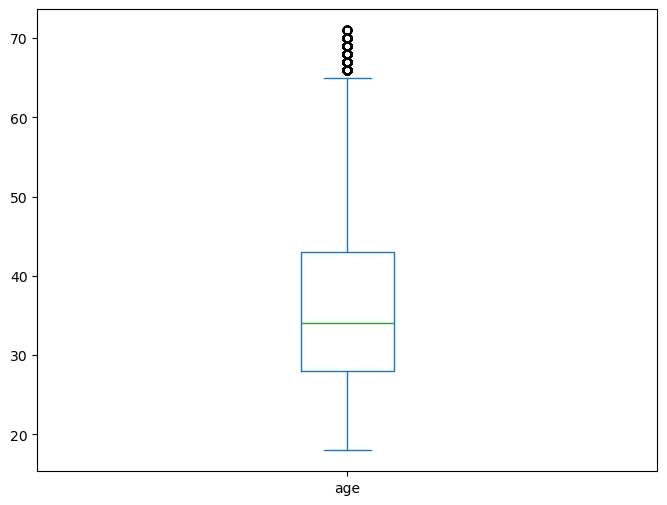

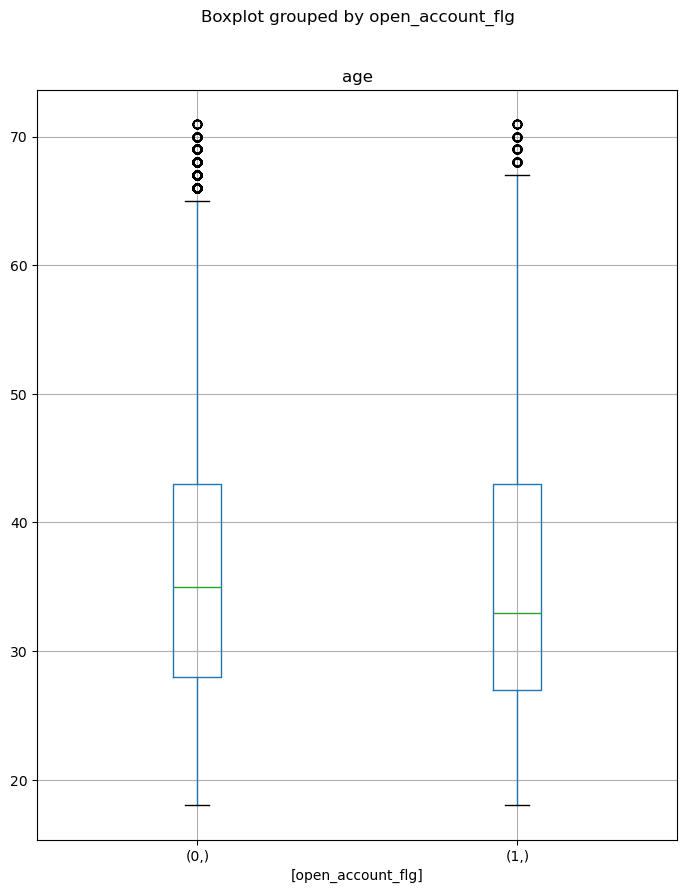

In [ ]:
credit['age'].plot.box(figsize=(8, 6))

boxplot = credit.boxplot(column=['age'], by=['open_account_flg'], figsize=(8, 10))

C:\Users\Lana\AppData\Local\Temp\ipykernel_21232\2321131777.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(credit['age'], hist=False, kde=True,
C:\Users\Lana\AppData\Local\Temp\ipykernel_21232\2321131777.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(credit[credit['op

Средний возраст по всем клиентам
36.49736741925093
Средний возраст по клиентам открывшим счет
35.78849480968858
Средний возраст по клиентам не открывшим счет
36.64880694297351


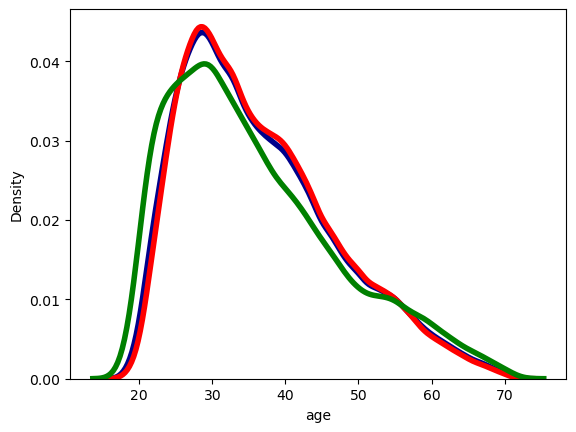

In [ ]:

sns.distplot(credit['age'], hist=False, kde=True,
             bins=int(180/5), color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
sns.distplot(credit[credit['open_account_flg']==0]['age'], hist=False, kde=True,
             bins=int(180/5), color = 'red',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
sns.distplot(credit[credit['open_account_flg']==1]['age'], hist=False, kde=True,
             bins=int(180/5), color = 'green',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
print( 'Средний возраст по всем клиентам', credit['age'].mean(),
      'Средний возраст по клиентам открывшим счет', credit[credit['open_account_flg']==1]['age'].mean(),
      'Средний возраст по клиентам не открывшим счет', credit[credit['open_account_flg']==0]['age'].mean(), sep='\n')


Явных отличий по возрасту зафиксировать не удалось. Однако, мы можем утвердить, что чаще открывают счет ("Равновероятно" в любом банке) клиенты в возрасте 36 лет.

**7 Критерий: возраст 36 лет**

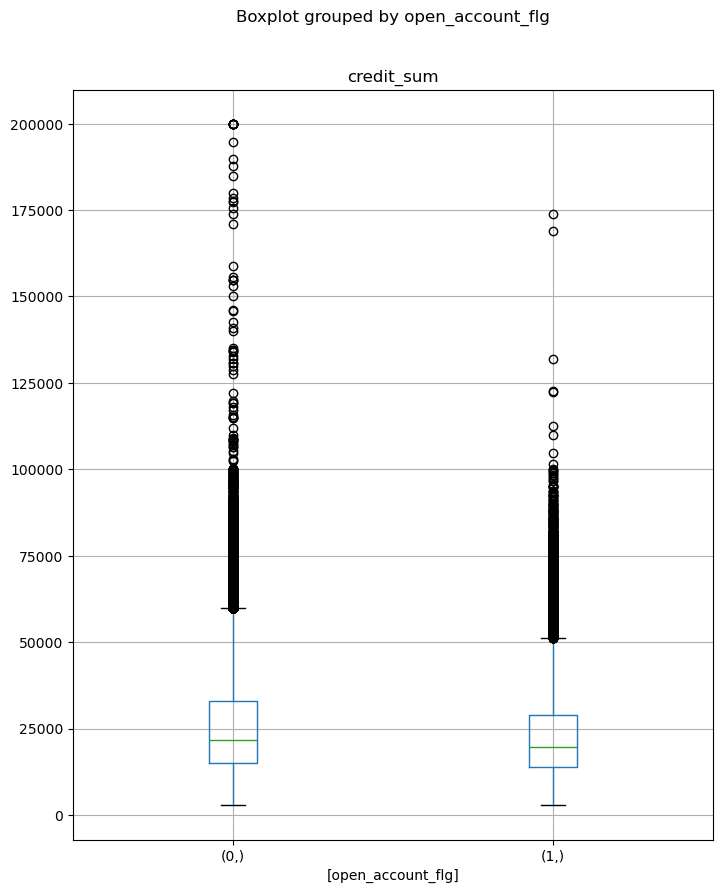

In [ ]:
boxplot = credit.boxplot(column=['credit_sum'], by=['open_account_flg'], figsize=(8, 10))

Есть некоторое различие по суммам кредита. Рассмотрим распределения.

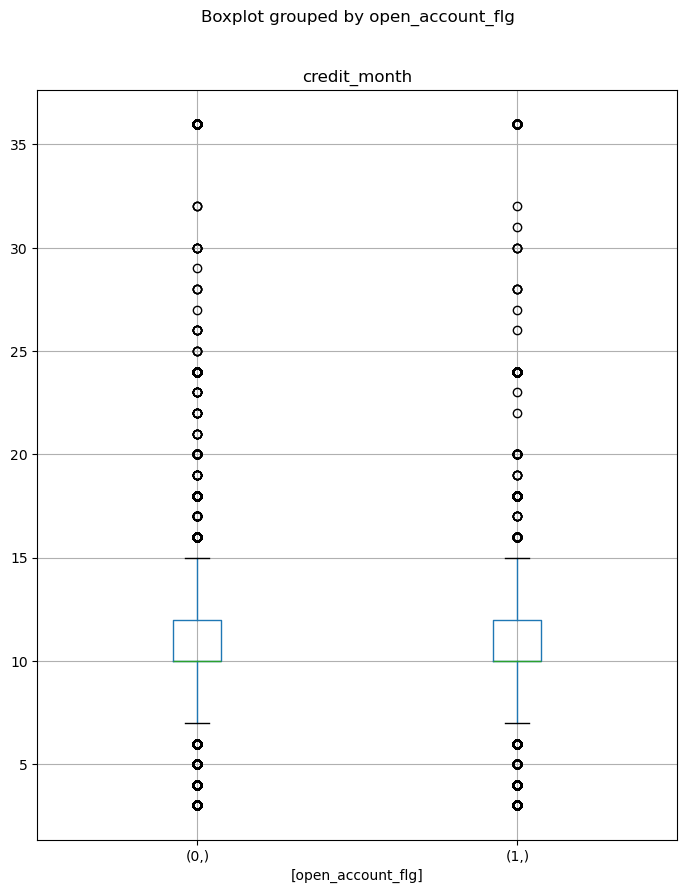

In [ ]:
boxplot = credit.boxplot(column=['credit_month'], by=['open_account_flg'], figsize=(8, 10))

Явных отличий по месяцам кредита не зафиксировано.

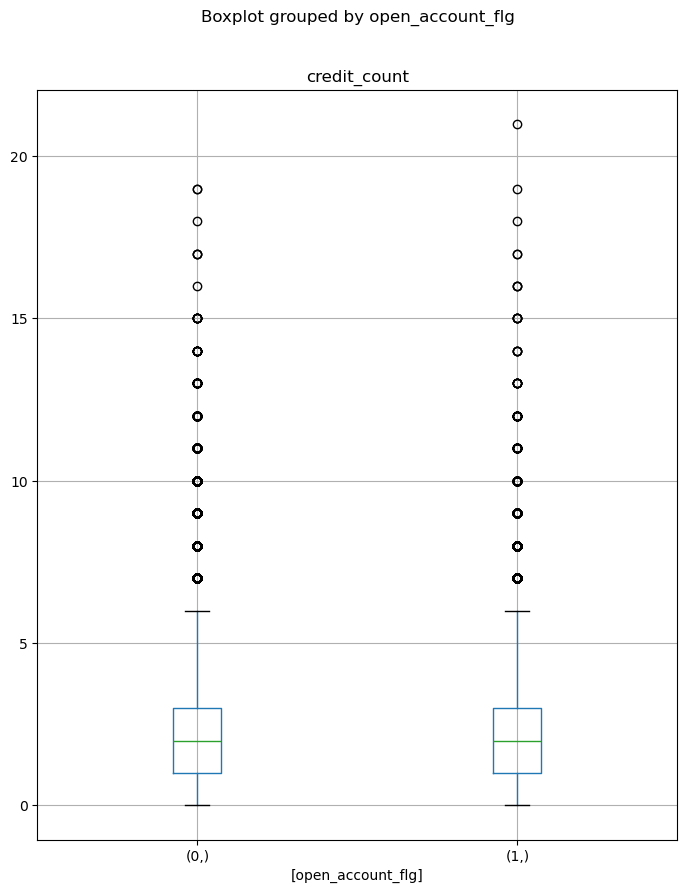

In [ ]:
boxplot = credit[credit['credit_count']!= 999].boxplot(column=['credit_count'], by=['open_account_flg'], figsize=(8, 10)) #NИсключили фиктивно заданную величину

Явных отличий по количеству кредитов не зафиксировано.

overdue_credit_count
0.0      154134
999.0      9230
1.0        7326
2.0          50
3.0           5
Name: count, dtype: int64

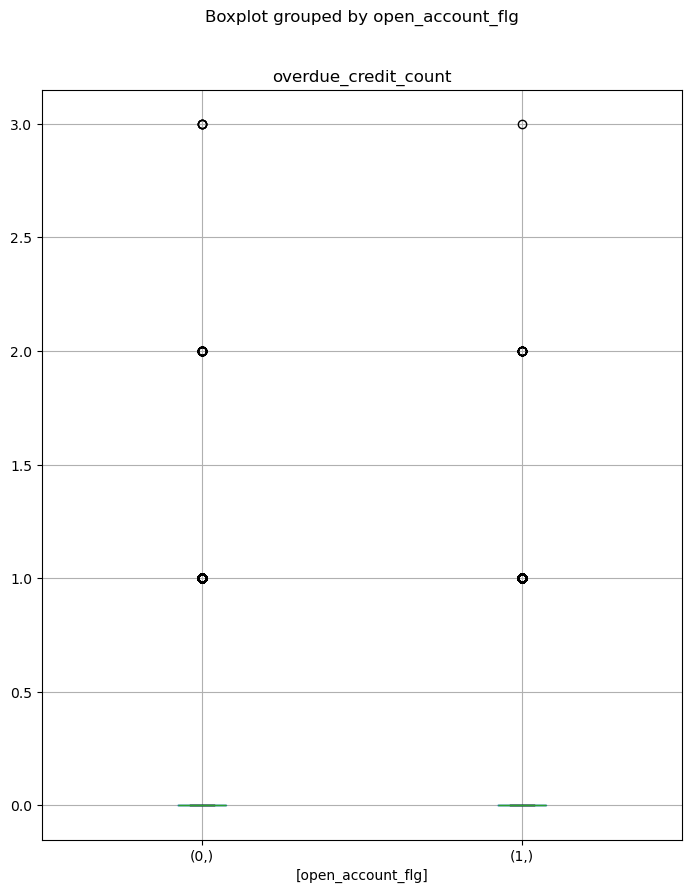

In [ ]:
boxplot = credit[credit['overdue_credit_count']!= 999].boxplot(column=['overdue_credit_count'], by=['open_account_flg'], figsize=(8, 10)) #Исключили фиктивно заданную величину

credit['overdue_credit_count'].value_counts()

Явных отличий по количеству просроченных кредитов не зафиксировано.

<h3>Двумерный анализ </h3>

Таблица корреляции

In [ ]:
correlation_matrix = credit.corr(numeric_only=True)
correlation_matrix

,client_id,age,credit_sum,credit_month,score_shk,avregzarplata,monthly_income,credit_count,overdue_credit_count,open_account_flg
client_id,1.000000,-0.000790,-0.001458,0.000004,0.001254,-0.000474,-0.001254,0.000970,0.000951,0.000268
age,-0.000790,1.000000,-0.096600,0.007104,-0.166284,-0.015476,-0.014885,-0.214815,-0.215672,-0.031068
credit_sum,-0.001458,-0.096600,1.000000,0.228326,0.054469,0.198751,0.351493,0.041520,0.041400,-0.072040
credit_month,0.000004,0.007104,0.228326,1.000000,0.040401,-0.003756,0.007657,-0.011217,-0.011588,0.025811
score_shk,0.001254,-0.166284,0.054469,0.040401,1.000000,-0.050900,-0.107261,0.150021,0.150862,0.048687
avregzarplata,-0.000474,-0.015476,0.198751,-0.003756,-0.050900,1.000000,0.335120,0.026257,0.026173,0.018628
monthly_income,-0.001254,-0.014885,0.351493,0.007657,-0.107261,0.335120,1.000000,-0.045378,-0.046454,-0.023694
credit_count,0.000970,-0.214815,0.041520,-0.011217,0.150021,0.026257,-0.045378,1.000000,0.999971,0.124318
overdue_credit_count,0.000951,-0.215672,0.041400,-0.011588,0.150862,0.026173,-0.046454,0.999971,1.000000,0.124080
open_account_flg,0.000268,-0.031068,-0.072040,0.025811,0.048687,0.018628,-0.023694,0.124318,0.124080,1.000000


<Axes: >

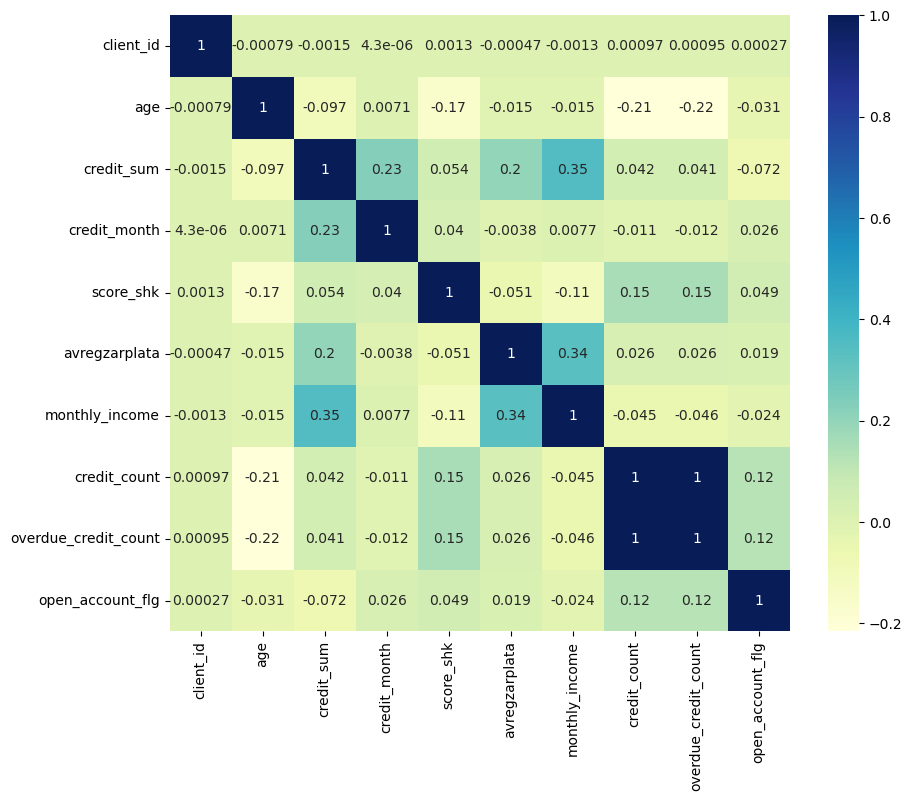

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix ,cmap="YlGnBu",annot=True)

#sns.cubehelix_palette(as_cmap=True),

Зафиксировали таблицу корреляции общую, для сравнения с корреляцией после разделения на группы (с полученной картой и без)

Разделение данных на открывших счет и не открывших.

In [ ]:
credit['open_account_flg'].value_counts()
credit_open = credit[ credit['open_account_flg']==1]
credit_not_open = credit[ credit['open_account_flg']==0]
print('Количество всех клиентов:', len(credit),'Количество клиентов открывших счет:', len(credit_open),'Количество клиентов без открытого счета:', len(credit_not_open), sep='\n')

Количество всех клиентов:
170745
Количество клиентов открывших счет:
30056
Количество клиентов без открытого счета:
140689


Рассмотрение основных значений по созданному разделению:

In [ ]:
credit_open.describe()

,client_id,age,credit_sum,credit_month,score_shk,avregzarplata,monthly_income,credit_count,overdue_credit_count,open_account_flg
count,30056.000000,30056.000000,30056.000000,30056.000000,30056.000000,30056.000000,30056.000000,30056.000000,30056.000000,30056.0
mean,85402.609030,35.788495,23564.712491,11.178234,0.482561,33429.144597,38854.457945,116.630789,114.688382,1.0
std,49225.465084,11.428049,14880.805257,4.069853,0.127364,13194.266811,23250.872620,317.696971,318.391381,0.0
min,18.000000,18.000000,3000.000000,3.000000,0.072468,16830.000000,5000.000000,0.000000,0.000000,1.0
25%,42974.750000,27.000000,13826.785000,10.000000,0.393612,25300.000000,25000.000000,1.000000,0.000000,1.0
50%,85414.000000,33.000000,19789.000000,10.000000,0.473374,27720.000000,35000.000000,2.000000,0.000000,1.0
75%,127940.500000,43.000000,28778.000000,12.000000,0.562660,42460.000000,48000.000000,4.000000,0.000000,1.0
max,170730.000000,71.000000,174000.000000,36.000000,1.054699,66880.000000,500000.000000,999.000000,999.000000,1.0


In [ ]:
credit_not_open.describe()

,client_id,age,credit_sum,credit_month,score_shk,avregzarplata,monthly_income,credit_count,overdue_credit_count,open_account_flg
count,140689.000000,140689.000000,140689.000000,140689.000000,140689.000000,140689.000000,140689.000000,140689.000000,140689.000000,140689.0
mean,85367.888058,36.648807,26635.680401,10.938538,0.466674,32811.920335,40412.555829,43.043003,41.091606,0.0
std,49303.924628,10.341574,16459.398108,3.410552,0.123416,12489.802434,25402.585615,197.896828,198.293455,0.0
min,1.000000,18.000000,2736.000000,3.000000,0.000000,0.000000,5000.000000,0.000000,0.000000,0.0
25%,42618.000000,28.000000,15043.000000,10.000000,0.376467,25520.000000,25000.000000,1.000000,0.000000,0.0
50%,85358.000000,35.000000,21600.000000,10.000000,0.458822,27390.000000,35000.000000,2.000000,0.000000,0.0
75%,128092.000000,43.000000,32990.000000,12.000000,0.550309,42460.000000,50000.000000,3.000000,0.000000,0.0
max,170746.000000,71.000000,200000.000000,36.000000,1.128291,66880.000000,950000.000000,999.000000,999.000000,0.0


In [ ]:
def shapiro_correct(x, row):
    test = row[x].dropna()
    stat, p = stats.shapiro(test)
    print('Statistic=%.3f, p -value=%3f' % (stat,p))


In [ ]:
colums= ['age', 'credit_month', 'credit_sum','credit_month','score_shk', 'monthly_income', 'credit_count', 'overdue_credit_count']

for i in colums:
    print(f'Тест на нормальное распределение Шапиро-Уилка столбца "{i}"')
    shapiro_correct(i, credit)
    print()

#аналогично для credit_not_open и credit_open

Тест на нормальное распределение Шапиро-Уилка столбца "age"
Statistic=0.950, p -value=0.000000

Тест на нормальное распределение Шапиро-Уилка столбца "credit_month"
Statistic=0.645, p -value=0.000000

Тест на нормальное распределение Шапиро-Уилка столбца "credit_sum"
Statistic=0.877, p -value=0.000000

Тест на нормальное распределение Шапиро-Уилка столбца "credit_month"
Statistic=0.645, p -value=0.000000

Тест на нормальное распределение Шапиро-Уилка столбца "score_shk"
Statistic=0.994, p -value=0.000000

Тест на нормальное распределение Шапиро-Уилка столбца "monthly_income"
Statistic=0.727, p -value=0.000000

Тест на нормальное распределение Шапиро-Уилка столбца "credit_count"
Statistic=0.241, p -value=0.000000

Тест на нормальное распределение Шапиро-Уилка столбца "overdue_credit_count"
Statistic=0.236, p -value=0.000000



c:\Users\Lana\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Большинство столбцов стремится  распределение следующих столбцов стремится к нормальному
"age"
"credit_month"
"credit_sum"
"credit_month"
"score_shk"
"monthly_income"

<Axes: >

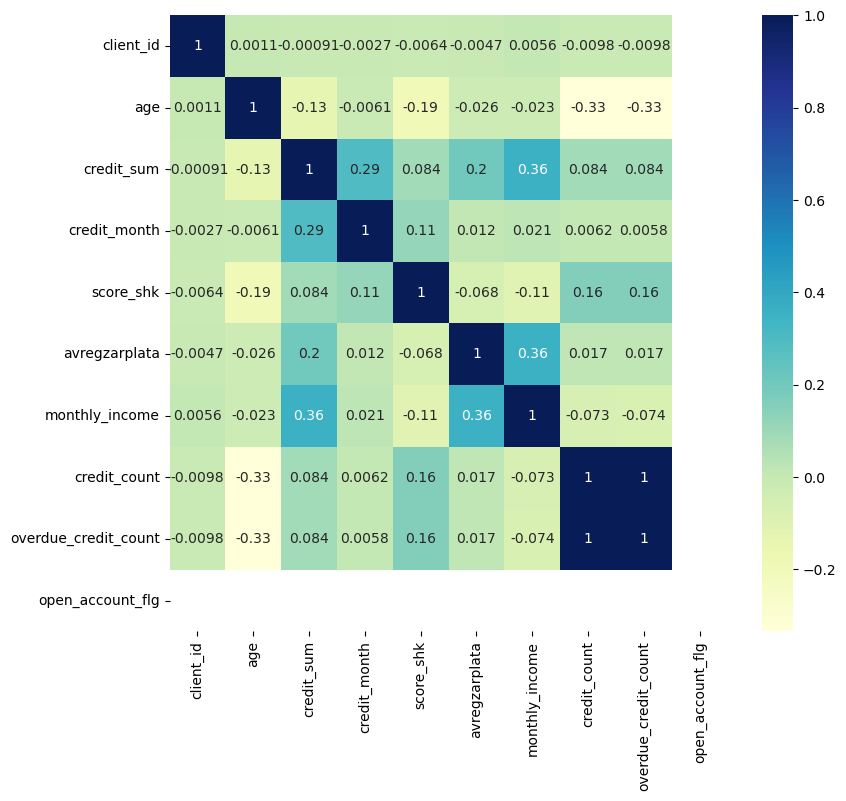

In [ ]:
plt.figure(figsize=(9, 8))
correlation_matrix_n = credit_open.corr(numeric_only=True)
sns.heatmap(correlation_matrix_n ,cmap="YlGnBu",annot=True)

<Axes: >

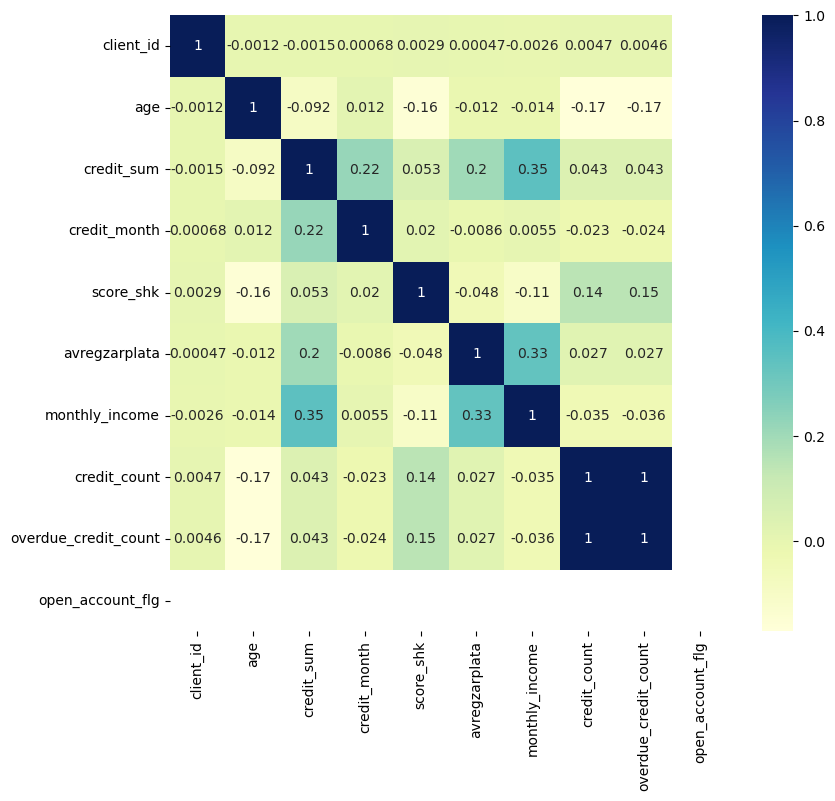

In [ ]:
plt.figure(figsize=(9, 8))
correlation_matrix_o = credit_not_open.corr(numeric_only=True)
sns.heatmap(correlation_matrix_o,cmap="YlGnBu",annot=True)

Корреляция данных при разделении столбцов в общей картине не поменялась.

Можно отметить только связь monthly_income(Месячный заработок) и avregzarplata(Средняя заработная плата в регионе), что вполне ожидаемо и логично.

А так же overdue_credit_count (Количество просроченных кредитов у клиента) и  open_account_flg(Факт открытия кредитного счета в данном банке). Что для нас уже более важно.
Проверим как количество просроченных кредитов влияет на открытие кредитного счета.

Выдвигаем гипотезу.

<h4>Гипотеза 1: Количества просроченных кредитов влияет на вероятность открытия счета в банке </h4>

C:\Users\Lana\AppData\Local\Temp\ipykernel_21232\795550830.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(credit_open[credit_open['overdue_credit_count'] != 999.0]['overdue_credit_count'],bins=30)
C:\Users\Lana\AppData\Local\Temp\ipykernel_21232\795550830.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

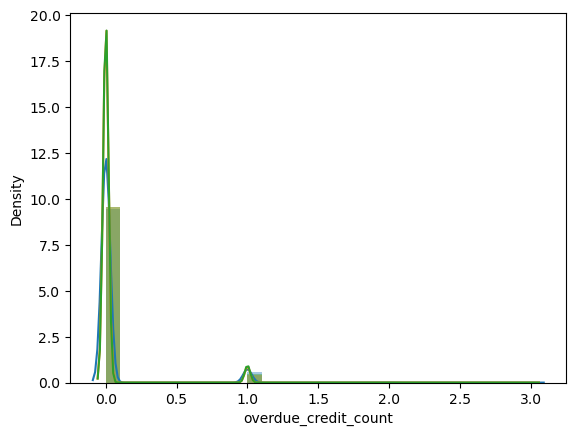

In [ ]:
sns.distplot(credit_open[credit_open['overdue_credit_count'] != 999.0]['overdue_credit_count'],bins=30)
sns.distplot(credit_not_open[credit_not_open['overdue_credit_count'] != 999.0]['overdue_credit_count'],bins=30)
sns.distplot(credit[credit['overdue_credit_count'] != 999.0]['overdue_credit_count'],bins=30)
plt.show()

In [ ]:
print('credit_open', credit_open[credit_open['overdue_credit_count'] != 999.0]['overdue_credit_count'].value_counts(),
'credit_not_open', credit_not_open[credit_not_open['overdue_credit_count'] != 999.0]['overdue_credit_count'].value_counts(), sep='\n')

credit_open
overdue_credit_count
0.0    25102
1.0     1488
2.0       16
3.0        1
Name: count, dtype: int64
credit_not_open
overdue_credit_count
0.0    129032
1.0      5838
2.0        34
3.0         4
Name: count, dtype: int64


По распределению видно, что изменяется только количество значений. Характер распределения остается прежним. Мы не можем утверждать, что количество просроченных кредитов влияет на открытие счета в банке.

Гипотеза 1 - опровергнута.